<a href="https://colab.research.google.com/github/Loki-33/Stuffs/blob/main/LDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 52.8 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from gensim import corpora
from gensim.models import LdaModel
from operator import itemgetter
from nltk.corpus import stopwords
from sklearn.feature_extraction._stop_words import ENGLISH_STOP_WORDS

In [ ]:
texts = [['bank','river','shore','water'],
        ['river','water','flow','fast','tree'],
        ['bank','water','fall','flow'],
        ['bank','bank','water','rain','river'],
        ['river','water','mud','tree'],
        ['money','transaction','bank','finance'],
        ['bank','borrow','money'],
        ['bank','finance'],
        ['finance','money','sell','bank'],
        ['borrow','sell'],
        ['bank','loan','sell']]

In [ ]:
# transforming into bag of words
texts_dict= corpora.Dictionary(texts)
corpus= [texts_dict.doc2bow(text) for text in texts]

In [ ]:
corpus

[[(0, 1), (1, 1), (2, 1), (3, 1)],
 [(1, 1), (3, 1), (4, 1), (5, 1), (6, 1)],
 [(0, 1), (3, 1), (5, 1), (7, 1)],
 [(0, 2), (1, 1), (3, 1), (8, 1)],
 [(1, 1), (3, 1), (6, 1), (9, 1)],
 [(0, 1), (10, 1), (11, 1), (12, 1)],
 [(0, 1), (11, 1), (13, 1)],
 [(0, 1), (10, 1)],
 [(0, 1), (10, 1), (11, 1), (14, 1)],
 [(13, 1), (14, 1)],
 [(0, 1), (14, 1), (15, 1)]]

In [ ]:
np.random.seed(1234)
texts_model = LdaModel(
    corpus,
    id2word = texts_dict,
    num_topics = 2,
    passes = 5,
    iterations=50
)

In [ ]:
texts_model.show_topics()

[(0,
  '0.157*"sell" + 0.122*"borrow" + 0.109*"bank" + 0.076*"loan" + 0.075*"mud" + 0.074*"tree" + 0.065*"water" + 0.063*"river" + 0.062*"money" + 0.033*"finance"'),
 (1,
  '0.215*"bank" + 0.130*"water" + 0.103*"river" + 0.092*"finance" + 0.077*"money" + 0.067*"flow" + 0.043*"tree" + 0.040*"fall" + 0.040*"shore" + 0.040*"rain"')]

In [ ]:
print(texts_model.get_term_topics('water'))
print(texts_model.get_term_topics('bank'))

[(0, np.float32(0.042623676)), (1, np.float32(0.11780182))]
[(0, np.float32(0.087182336)), (1, np.float32(0.20459789))]


In [ ]:
bow_water = ['bank', 'water', 'bank']
bow = texts_model.id2word.doc2bow(bow_water)
bow

[(0, 2), (3, 1)]

In [ ]:
doc_topics, word_topics, phi_values = texts_model.get_document_topics(
    bow, per_word_topics=True
)

In [ ]:
print('document topics: ', doc_topics)
print()

document topics:  [(0, np.float32(0.14506154)), (1, np.float32(0.85493845))]



In [ ]:
for word_id, topic in word_topics:
    print(texts_model.id2word[word_id], topic)

bank [1, 0]
water [1, 0]


In [ ]:
for word_id, topic in phi_values:
    print(texts_model.id2word[word_id], topic)

bank [(0, np.float32(0.05618309)), (1, np.float32(1.9438156))]
water [(0, np.float32(0.023954742)), (1, np.float32(0.9760441))]


In [ ]:
bow_finance = ['bank', 'finance']
bow = texts_model.id2word.doc2bow(bow_finance)  # convert to bag of words format first
doc_topics, word_topics, phi_values = texts_model.get_document_topics(
    bow, per_word_topics = True)
word_topics

[(0, [1, 0]), (10, [1, 0])]

In [ ]:
############################################

In [ ]:
wiki = pd.read_csv('people_wiki.csv')

In [ ]:
wiki.head()

,URI,name,text
0,<http://dbpedia.org/resource/Digby_Morrell>,Digby Morrell,digby morrell born 10 october 1979 is a former...
1,<http://dbpedia.org/resource/Alfred_J._Lewy>,Alfred J. Lewy,alfred j lewy aka sandy lewy graduated from un...
2,<http://dbpedia.org/resource/Harpdog_Brown>,Harpdog Brown,harpdog brown is a singer and harmonica player...
3,<http://dbpedia.org/resource/Franz_Rottensteiner>,Franz Rottensteiner,franz rottensteiner born in waidmannsfeld lowe...
4,<http://dbpedia.org/resource/G-Enka>,G-Enka,henry krvits born 30 december 1974 in tallinn ...


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
texts = wiki['text'].apply(lambda x: x.split(' ')).tolist()

In [ ]:
dictionary = corpora.Dictionary(texts)
len(dictionary)

548561

In [ ]:
stoplist = set(stopwords.words('english')).union(set(ENGLISH_STOP_WORDS))
stop_ids = [dictionary.token2id[stopword] for stopword in stoplist
            if stopword in dictionary.token2id]

In [ ]:
dictionary.filter_tokens(stop_ids)

In [ ]:
dictionary.filter_extremes(no_below=2) # remove words that appead in < 2 docs

In [ ]:
dictionary.compactify()
len(dictionary)

100000

In [ ]:
corpus = [dictionary.doc2bow(text) for text in texts]

In [ ]:
# model = LdaModel(
#     corpus,
#     id2word = dictionary,
#     num_topics = 10,
#     iterations=200
# )

# model.save('model.lda')

In [ ]:
model= LdaModel.load('model.lda')

In [ ]:
topics = model.show_topics(num_words=10, formatted=False)
topics

[(0,
  [('new', np.float32(0.01063693)),
   ('art', np.float32(0.010138032)),
   ('work', np.float32(0.009102362)),
   ('york', np.float32(0.005491442)),
   ('company', np.float32(0.004736071)),
   ('museum', np.float32(0.004119236)),
   ('including', np.float32(0.004036965)),
   ('american', np.float32(0.003897532)),
   ('design', np.float32(0.0037436895)),
   ('business', np.float32(0.0036057557))]),
 (1,
  [('university', np.float32(0.034158673)),
   ('school', np.float32(0.010209146)),
   ('member', np.float32(0.009212828)),
   ('served', np.float32(0.009029804)),
   ('research', np.float32(0.008590751)),
   ('professor', np.float32(0.008489034)),
   ('college', np.float32(0.008277534)),
   ('law', np.float32(0.0072807074)),
   ('president', np.float32(0.006464479)),
   ('director', np.float32(0.006463317))]),
 (2,
  [('united', np.float32(0.0083102165)),
   ('president', np.float32(0.006552893)),
   ('states', np.float32(0.0063350466)),
   ('general', np.float32(0.0059627932)),
  

In [ ]:
obama = wiki.loc[wiki['name'] == 'Barack Obama', 'text'].tolist()[0].split()
obama_bow = dictionary.doc2bow(obama)
model[obama_bow]

[(0, np.float32(0.032616775)),
 (1, np.float32(0.16858888)),
 (2, np.float32(0.5492581)),
 (9, np.float32(0.2417583))]

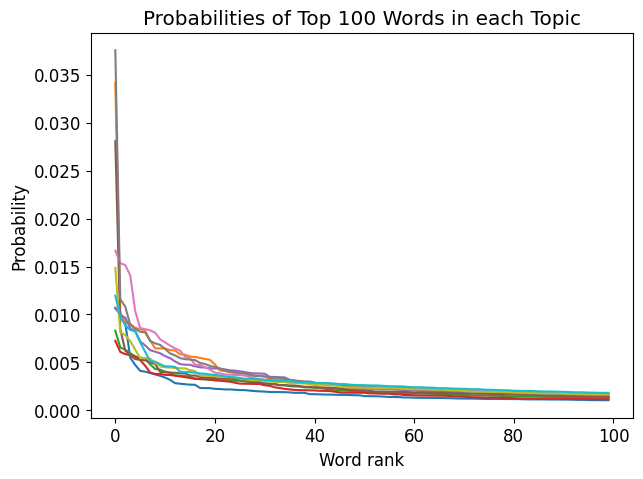

In [ ]:
plt.rcParams['figure.figsize'] =7,5
plt.rcParams['font.size'] = 12
top_n_words = 100
topics = model.show_topics(
  num_topics = 10, num_words = top_n_words, formatted = False)

for _, infos in topics:
  probs = [prob for _, prob in infos]
  plt.plot(range(top_n_words), probs)

plt.xlabel('Word rank')
plt.ylabel('Probability')
plt.title('Probabilities of Top 100 Words in each Topic')
plt.show()

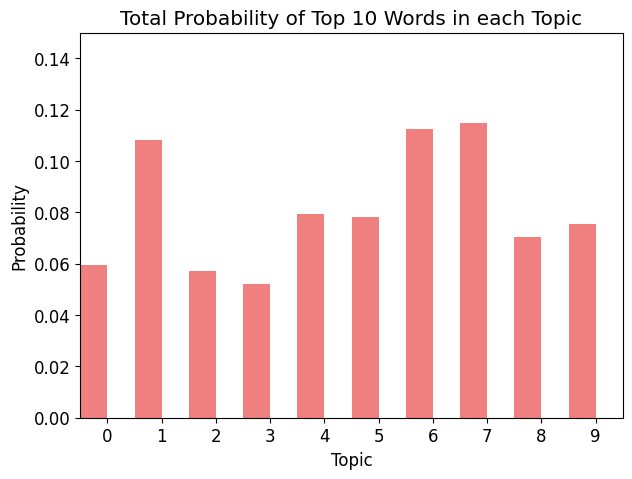

In [ ]:
top_probs = []
top_n_words = 10
topics = model.show_topics(num_words = top_n_words, formatted = False)
for _, infos in topics:
  prob = sum([prob for _, prob in infos])
  top_probs.append(prob)

ind = np.arange(top_n_words)
width = 0.5

fig, ax = plt.subplots()

ax.bar(ind - (width / 2), top_probs, width, color = 'lightcoral')
ax.set_xticks(ind)

plt.xlabel('Topic')
plt.ylabel('Probability')
plt.title('Total Probability of Top 10 Words in each Topic')
plt.xlim(-0.5, 9.5)
plt.ylim(0, 0.15)
plt.show()

In [ ]:
# alhpa, prior dist over topic weights in each doc
# eta, prior dist over word weights in each topic
# they can be thought as the smoothing parameters

In [ ]:
import os
path_alpha_high = os.path.join('jk', 'topic_model_alpha_high.lda')
path_alpha_low = os.path.join('jk', 'topic_model_alpha_low.lda')

In [ ]:
if not os.path.isfile(path_alpha_high):
  topic_model_alpha_high = LdaModel(
    corpus,
    num_topics = 10,
    id2word = dictionary,
    alpha = 10,
    iterations = 200
  )
  topic_model_alpha_low = LdaModel(
    corpus,
    num_topics = 10,
    id2word = dictionary,
    alpha = 0.001,
    iterations = 200
  )
  topic_model_alpha_high.save(path_alpha_high)
  topic_model_alpha_low.save(path_alpha_low)

In [ ]:
model_alpha_low = LdaModel.load(path_alpha_low)
model_alpha_high = LdaModel.load(path_alpha_high)

In [ ]:
def sort_topics(model, doc):
  bow = dictionary.doc2bow(doc)
  doc_topics = model.get_document_topics(bow, minimum_probability=0)
  doc_topics.sort(key=itemgetter(1), reverse=True)
  probs = [prob for _, prob in doc_topics]
  return probs

In [ ]:
alpha_low = sort_topics(model_alpha_low, obama)
alpha_high = sort_topics(model_alpha_high, obama)
alpha_default = sort_topics(model, obama)

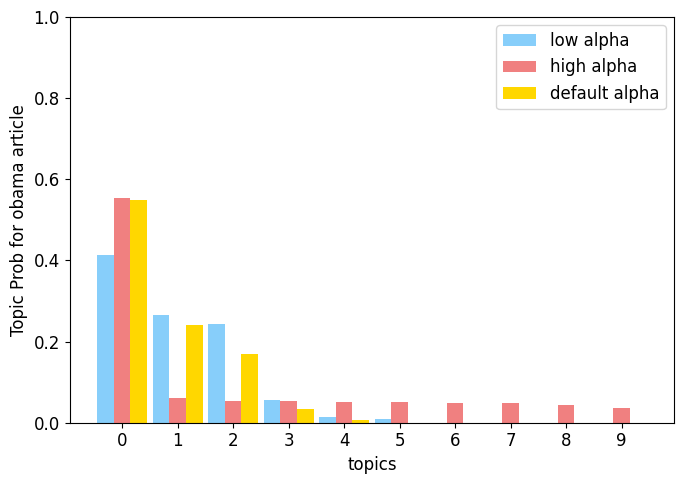

In [ ]:
width = 0.3
ind = np.arange(len(alpha_low))
fig = plt.figure()
ax = fig.add_subplot(111)
b1 = ax.bar(ind, alpha_low, width, color='lightskyblue')
b2 = ax.bar(ind + width, alpha_high, width, color='lightcoral')
b3 = ax.bar(ind + 2 * width, alpha_default, width, color='gold')
ax.set_xticks(ind + width)
ax.set_xticklabels(range(len(alpha_low)))
ax.set_ylabel('Topic Prob for obama article')
ax.set_xlabel('topics')
ax.set_ylim(0, 1.0)
ax.legend(handles=[b1,b2,b3],
          labels=['low alpha', 'high alpha', 'default alpha'])
plt.tight_layout()
plt.show()

In [ ]:
def